# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set()

import warnings
warnings.filterwarnings('ignore')


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

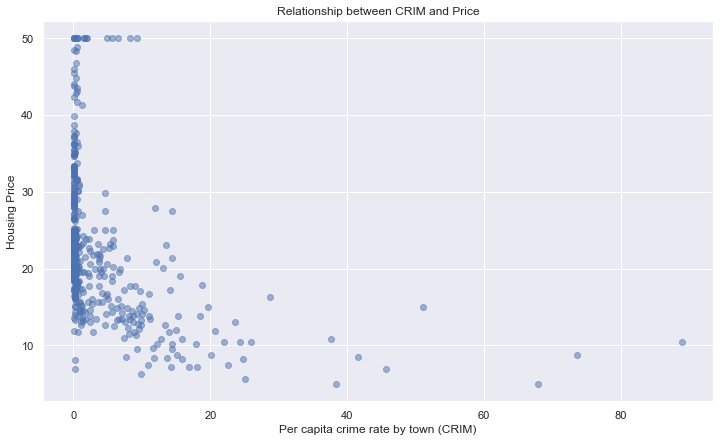

In [12]:
plt.figure(figsize = (12,7))
plt.scatter(bos.CRIM, bos.PRICE, alpha = 0.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price")

Text(0.5,1,'Relationship between number of rooms and Price')

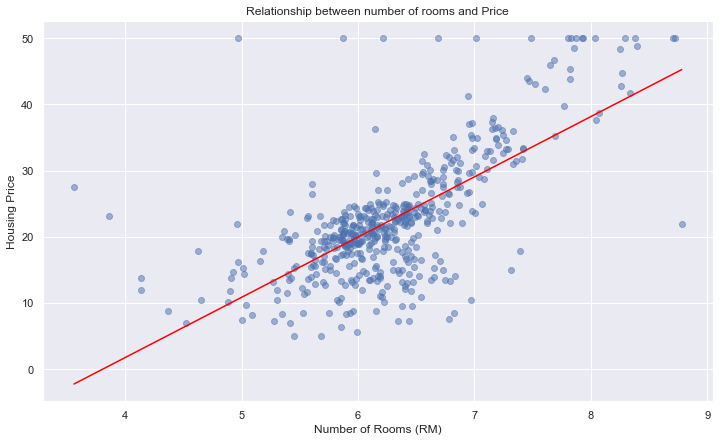

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize = (12,7))
plt.scatter(bos.RM, bos.PRICE, alpha = 0.5)
# Fitting Linear line
a,b = np.polyfit(bos.RM, bos.PRICE,1)
xu = np.unique(bos.RM)
yu = a*xu+b
plt.plot(xu,yu, color = 'red')
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between number of rooms and Price")

Text(0.5,1,'Relationship between PT-ratio and Price')

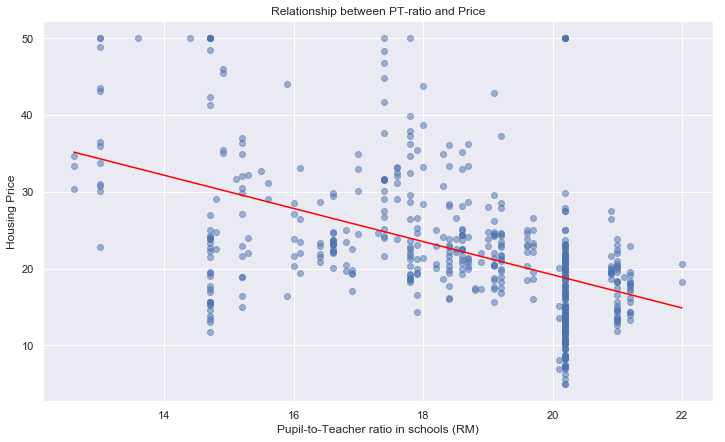

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize = (12,7))
plt.scatter(bos.PTRATIO, bos.PRICE, alpha =0.5)
# Fitting Linear line
a,b = np.polyfit(bos.PTRATIO, bos.PRICE,1)
xu = np.unique(bos.PTRATIO)
yu = a*xu+b
plt.plot(xu,yu, color = 'red')
plt.xlabel("Pupil-to-Teacher ratio in schools (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between PT-ratio and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In order to understand the relationship I am plotting the above three plots again as subplots

In [15]:
def lin_fit(x,y):
    """ Function to scatter plot x vs y and a linear fit"""
    plt.scatter(x,y,alpha = 0.5)
    xu = np.unique(x)
    a,b = np.polyfit(x,y,1)
    yu = a*xu+b
    plt.plot(xu,yu,color = 'red')

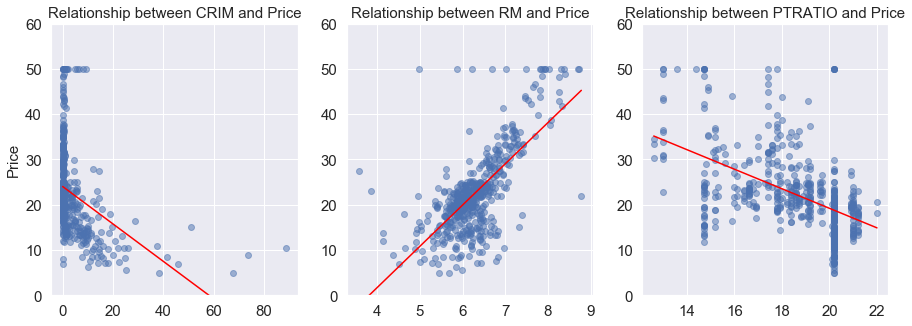

In [16]:
var = ['CRIM','RM','PTRATIO']
plt.figure(figsize = (15,5))
for i in range(len(var)):
    plt.subplot(1,3,i+1)
    lin_fit(bos[var[i]],bos.PRICE)
    plt.ylim([0,60])
    if(i==0):
        plt.ylabel('Price',size = '15')
    plt.yticks(size = '15')
    plt.xticks(size = '15')
    plt.title('Relationship between {} and Price'.format(var[i]),size = '15')

### Crime v/s Price

Based on the left most plot we see that relationship between the two variables is negative.As the crime rate per capita increase the price the housing price falls. This reduction in housing price in quiet sharp in the early data as the crime rate increases from 0 to 20 and after that the relation is almost linear with gradual reduction in price with increase in the crime rate. Overall the relationship is more of decaying exponential type rather than linear.

### Rooms v/s Price

The relationship between number of rooms per dwelling and the housing price is almost linear. The data seems to be highly correlated with few outliers in terms of housing price. This is simply because more rooms indicate larger house in general (assuming average room size is almost same).

### Pupil-Teacher Ratio v/s Price

PT ratio has negative (approximately average linear) relationship with housing prices. Schools with high PT ratio are usually in middle or lower income neighborhoods (usually public schools). There the number of pupils per teacher are low the quality of education is usually high as each student get relatively better attention/ assistance from the teacher.

### Correlation

Another way to check the relationship of different variables with dwelling price is to check simple correlation coffecient of features with the predictor (housing price) as done below.

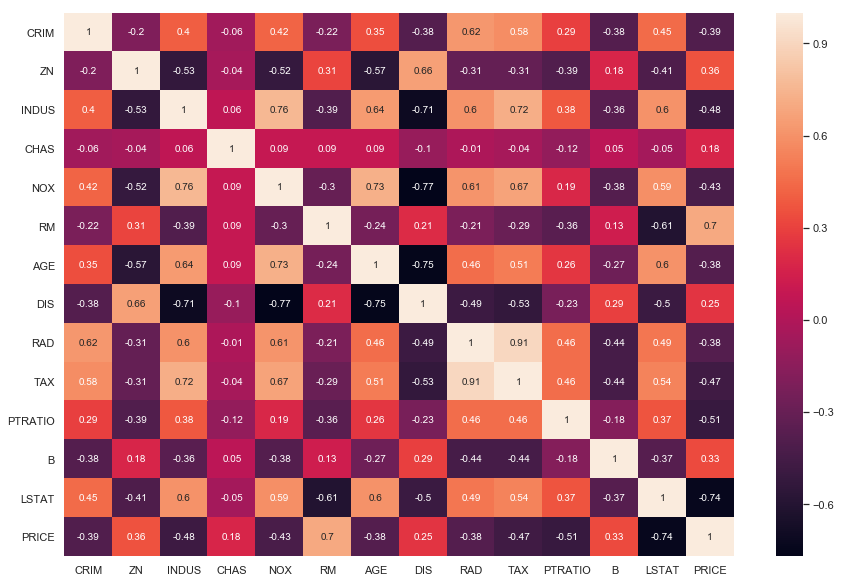

In [17]:
# Create a correlation matrix
corr_mat = bos.corr().round(2)
# Plot the matrix as heat map
plt.figure(figsize = (15,10))
sns.heatmap(data=corr_mat, annot=True);

From the results we see that number of rooms have the most positively correlated with the housing price. Both crime rate and the pupil-teacher ratio has negative correlation with the price. Compared to crime rate ptratio has higher correlation (magnitude wise) with price.

Another intersting point is that RAD and TAX are highly correlated and using both features during linear regression can cause colinearity issues.Same can be said for DIS, AGE and NOX.

Lets explore other features that are relatively better correlated to price than crime.

### LSTAT v/s Price

Lstat is indicator of lower status population. Assuming the indictor is expressed in terms of economic worth (lower-class families), we see that the housing prices in the town with higher population of lower-class families is lower. This is due to the fact that families with low earning can not afford houses at higher prices. This is evident from the left plot below. Although the relation is not completely linear rather bit curved

### Non-retail v/s Price

As the proportion of non-retail business increases the housing price falls. This is mainly due to retail stores are able to cater better to the family hosuing needs and this impact the housing price of the neighborhoods around them. This is evident from the plot on the right below.

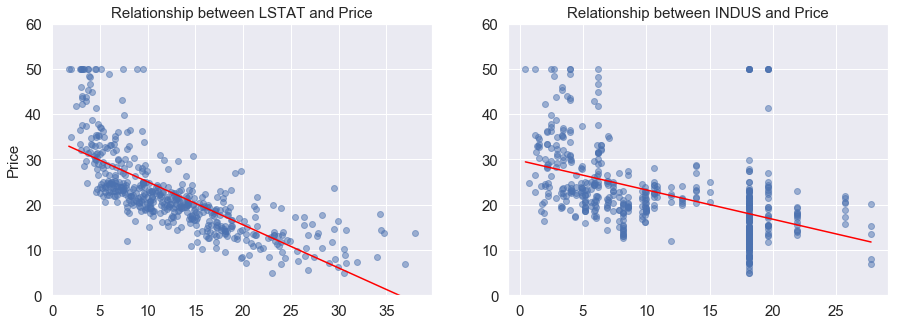

In [18]:
var = ['LSTAT','INDUS']
plt.figure(figsize = (15,5))
for i in range(len(var)):
    plt.subplot(1,2,i+1)
    lin_fit(bos[var[i]],bos.PRICE)
    plt.ylim([0,60])
    if(i==0):
        plt.ylabel('Price',size = '15')
    plt.yticks(size = '15')
    plt.xticks(size = '15')
    plt.title('Relationship between {} and Price'.format(var[i]),size = '15')

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

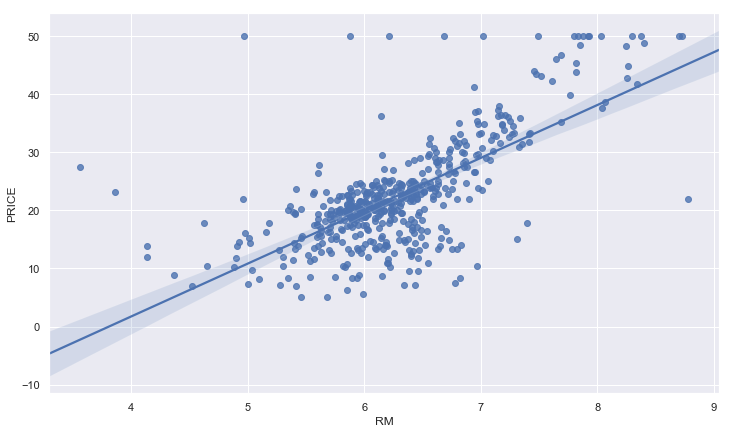

In [19]:
plt.figure(figsize = (12,7))
_ = sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


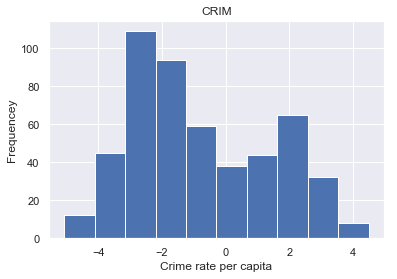

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

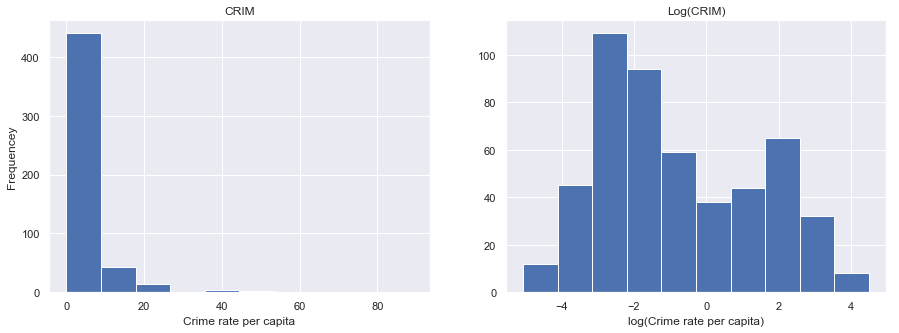

Skewness factor of original data: 5.222039072246122
Skewness factor after log transformation: 0.408718908433023


In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.subplot(1,2,2)
plt.hist(np.log(bos.CRIM))
plt.title("Log(CRIM)")
plt.xlabel("log(Crime rate per capita)")
plt.show()
print('Skewness factor of original data: {}'.format(stats.skew(bos.CRIM)))
print('Skewness factor after log transformation: {}'.format(stats.skew(np.log(bos.CRIM))))

We see that log transformation spreads the postively skewed data towards a RELATIVELY normal distribution (truly a bimodal distribution). Our main focus is on symmertry here as we exprect the features to be noramlly distributed. This is also evident from the skewness of the two plots. After log transformation the skewness is relatively closer to zero. 

This is due to the fact that taking logs "pulls in" more extreme values on the right (high values) relative to the median, while values at the far left (low values) tend to get stretched back, further away from the median.

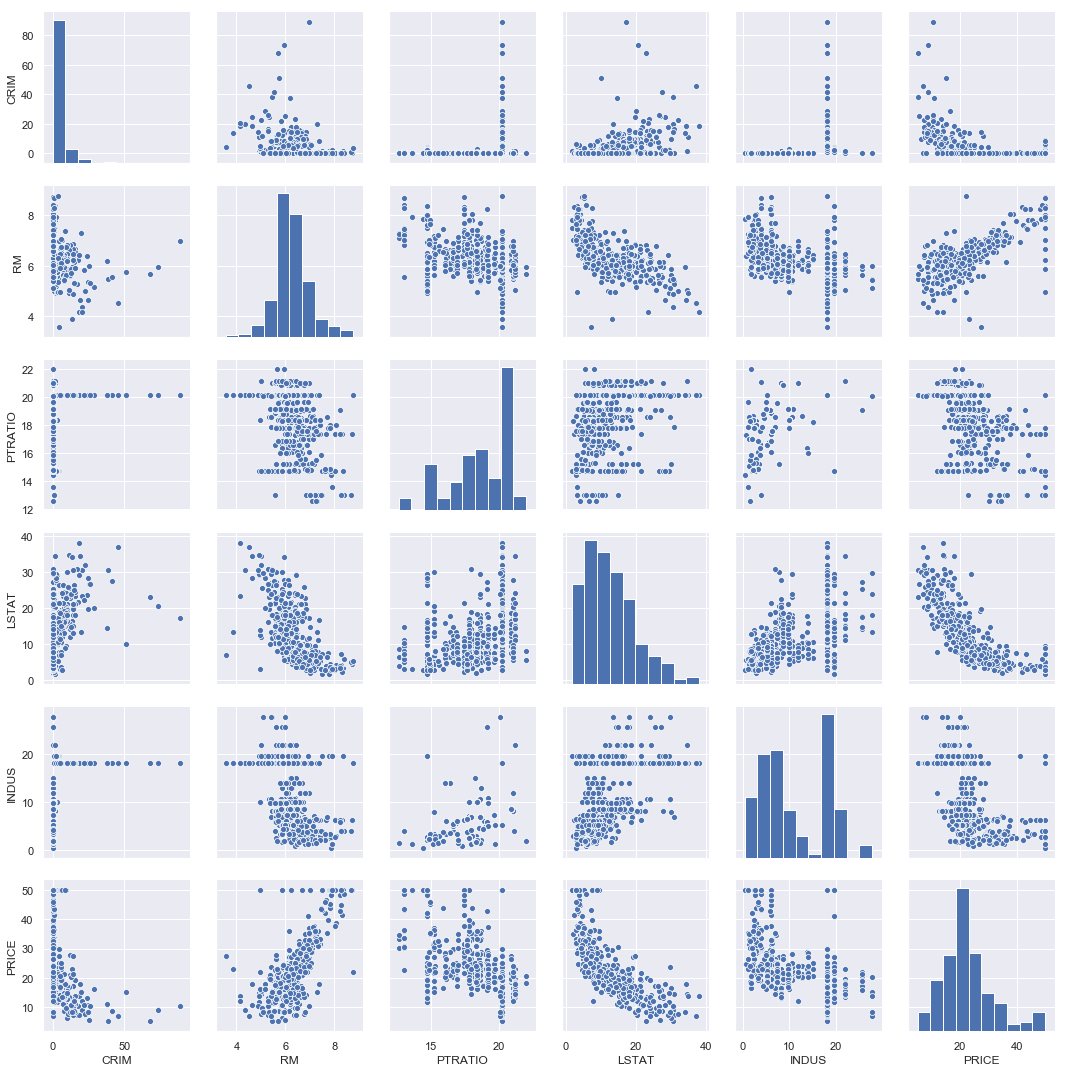

In [22]:
var = ['CRIM', 'RM','PTRATIO', 'LSTAT', 'INDUS', 'PRICE']
sns.pairplot(bos, vars=var)
plt.show();

The pair plot above shows few intersting features. Similar to crime rate, lstat and price data are also have slight positive skew but not as drastic as crime rate data. 

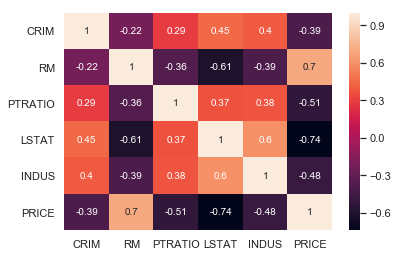

In [23]:
correlation_matrix = bos.loc[:,var].corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [24]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           2.49e-74
Time:                        20:19:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

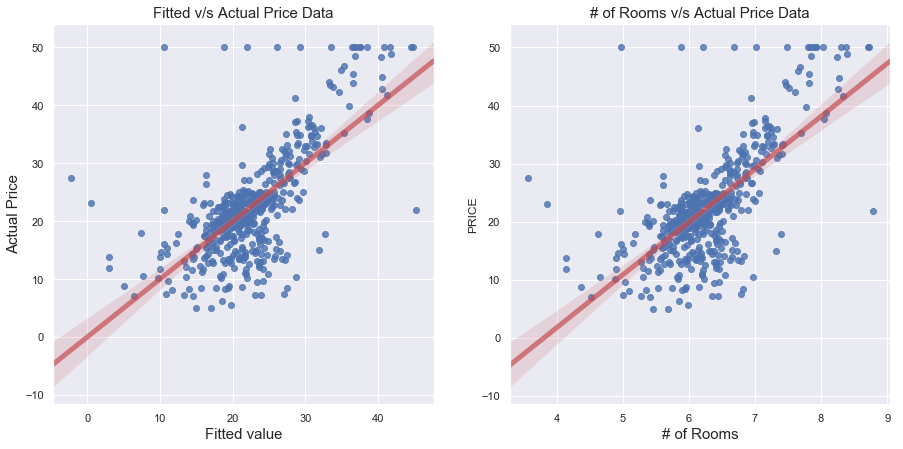

In [26]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.regplot(y=bos.PRICE, x=m.fittedvalues, fit_reg = True, line_kws={"color":"r","alpha":0.7,"lw":5});
plt.xlabel('Fitted value', size = '15')
plt.ylabel('Actual Price', size = '15')
plt.title('Fitted v/s Actual Price Data', size = '15');
plt.subplot(1,2,2)
sns.regplot(y=bos.PRICE, x=bos.RM, fit_reg = True, line_kws={"color":"r","alpha":0.7,"lw":5});
plt.xlabel('# of Rooms', size = '15')
plt.title('# of Rooms v/s Actual Price Data', size = '15');

Because of the linear nature if we just try to interpolate from the line plot we see that for houses with room less than 4 the price is almost zero and negative. This is one major drawback of the linear regression and why it is important to have visualization of the data. The fitted values are scaled 9 times the room and are shifted by intercept a bit higher for a better fit. Bit the model still fails with negative-predicted values of housing prices

In [27]:
bos_red = bos.drop(indexes, axis = 0)
m2 = ols('PRICE ~ RM',bos_red).fit()
print(m2.summary())

NameError: name 'indexes' is not defined

Impact of influential points on the linear fit was not so prominent. Points with Cooks distance below 0.5 are usually not influential. Even though the four points in the plots stood out but Cooks distance for all 4 points was less than 0.35. Plot below compares the impact on residual distrbituion plot. Even though not drastic the plot after removing the inflential points is lightly more normally distributed then the original data with less variance.

In [ ]:
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.distplot(m2.resid, bins = 30);
plt.xlabel('Residual', size = 15)
plt.ylim([0,0.11])
plt.xlim([-50,50])
plt.title('Original Plot', size = 15)
plt.subplot(1,2,2)
sns.distplot(m.resid, bins = 30);
plt.xlabel('Residual', size = 15)
plt.title('Influential Points Removed', size = 15)
plt.ylim([0,0.11])
plt.xlim([-50,50])

### Fitting Linear Regression using `sklearn`


In [ ]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [ ]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

In [ ]:
bos.info()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


Simple way to remove the intercept is to call the LinearRegression(fit_intercept = False)
I would not recomment removing the intercept as for the given problem there is not physical sense of having zero value for all predictors. Also having an intercept terms helps the model to to find a best fit at its level. Removing is means forcing the linear fit line to pass through origin this the model fit would be poor with non-zero mean of residual.
Besides havinng a normality condition, the residuals must have zero mean and a constant standard deviation at value of predictor vector. In order to have a linear fit the first conidtion is that the mean of the response at each predictor is linear function of that predictor.
We want the residuals to be normally distributed. There is no requirement for Y to be normally distributed only on contional basis Y|X ~ N(b0 + b1X, some_sigma)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [ ]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

In [ ]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [ ]:
yhat = lm.predict(X)

# your turn
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(yhat);
plt.ylabel('Rel. Frequency')
plt.title('Distribution Plot')
plt.xlabel('Predictions');
plt.subplot(1,2,2)
binsize = 50
plt.hist(yhat, bins = binsize);
plt.ylabel('Count')
plt.title('Histogram with {} bins'.format(binsize))
plt.xlabel('Predictions');

From the above plot we see that there seem to be one clear outlier on the farthest left side of the plot.

The above plot looks almost normal. But good thing about stats library is we have a lot of distribution options available and we can just check the best matching distribution with the above plot.

First based on the distribution shape we can assume that the distrbution belongs to location-scale family. To make the comparison on netural ground we assume default loc and scale 0,1 repsectively.

From different options the probability that above distrobution is a logistic distrbituion is the highest. Also from the plot, logistic distribution seems to fit the histogram better.
Loc and scale parameters give the spread and center of the distribtuion plot

In [ ]:
distributions = ["norm","exponnorm","loggamma","logistic", "exponweib","gamma"]
plt.figure(figsize = (15,6))
sns.distplot(yhat,color = "y")
for d in distributions:
    dist = getattr(stats, d)
    param = dist.fit(yhat)
    #Using KS Test
    D, pr = stats.kstest(yhat, d, args=param)
    print("p value for "+d+" = "+str(pr))
    pdf_fitted = dist.pdf(scipy.arange(len(yhat)), *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=d)
    plt.xlim(-10,50)
plt.legend(loc='upper right')
plt.show()

#### Impact of removing the outlier

Based on the distribution (histgram plot) there is only one outlier. If we remove this outlier and compare the two plots again we do not see a huge difference in the distribtuion of predicted values. Also note that the outlier has negative value which is just the nature of linear fit as the line extends in two dimension. Thus the data point is not reliable anyways and can be discarded.

In [ ]:
# Removing Outlier from Distribution plot
plt.figure(figsize = (10,6))
sns.distplot(yhat)
sns.distplot(yhat[yhat>=0])
plt.legend(['Original','Outlier Removed'])
plt.show()

# Scatterplots

In [ ]:
from scipy.stats import zscore
bos["pred_price"] = lm.predict(X)
bos["zpred_price"] = zscore(lm.predict(X))
bos["is_outlier"] = bos["zpred_price"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
bos[bos["is_outlier"]]

In [ ]:
indexes = [204,257,283,374,412,414]
plt.figure(figsize = (12,7))
plt.scatter(lm.predict(X),bos.PRICE);
plt.scatter(lm.predict(X)[indexes],bos.PRICE[indexes], s=indexes, alpha = 0.3, color = 'red')
plt.xlabel('Model Fit', size = '15')
plt.ylabel('Actual Price', size = '15')
plt.title('Fitted v/s Actual Price Data', size = '15');
plt.legend(['','outliers'])
plt.show()

sns.distplot(np.delete(yhat,indexes))

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(pred_resp)
clusters

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
pred_resp.plot.scatter(
  x = "prediction",
  y = "response",
  c = clusters,
  cmap = cmap,
  colorbar = True
)

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [ ]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [ ]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [ ]:
# your turn
# Run the Linear Regression Model
lm = LinearRegression()
x = bos.PTRATIO.values.reshape(-1,1)
y = bos.PRICE
lm.fit(x,y)
yhat = lm.predict(x)

# Print the Coefficient and Score
print('Estimated intercept coefficient: %0.4f'%(lm.intercept_))
print('Estimated intercept coefficient: %0.4f'%(lm.coef_))

# Plot the response and predictions.
plt.figure(figsize = (12,7))
plt.scatter(x,y)
plt.plot(x,yhat,color = 'red')
plt.xlabel('PTRATIO',size = '14')
plt.ylabel('Price ($1000)',size = '14')
plt.legend(['Observed','Predicted'])
plt.title('Housing Price v/s PTRATIO',size = '16')
plt.show()

The zero intercept does not provide any valuable information as PTratio of zero does not make sense.
The coeff $\beta_1$ for PTRatio how ever suggests a negative relation between then housing prices. For every one using increase in PT Ratio the price of house drops by about $2,157.

In [ ]:
R_sq = lm.score(x,y)
print('R-squared: {}'.format(R_sq))

$R^2$ is really low thus the predictors are not good at linear fit of housing price. The negative value support the point elaborated by $\beta_1$.

In [ ]:
# F-statistic using the formular
dof_RE = len(x)-1-x.shape[1] # Degree of freedom of residual error
F = R_sq *dof_RE/(1-R_sq)/x.shape[1]
print('F-Statistic (computed maunally): %0.4f'%(F))

# Using sklearn library
from sklearn.feature_selection import f_regression
f_test, _ = f_regression(x, y)
print('F-Statistic (built-in lib): %0.4f'%(f_test))

F-statistic is really high (far from 1) suggesting PT Ratio does have some impact on the housing price.

In [ ]:
# Compute t-statistic
newx = np.append(np.ones((len(x),1)), x, axis=1)
RSE = (sum((y-yhat)**2))/(dof_RE )

var_matrix= MSE*(np.linalg.inv(np.dot(newx.T,newx)).diagonal())
SE_beta1 = np.sqrt(var_matrix)
t_beta1 = lm.coef_/ SE_beta1[1]
print('t-statistic for beta1: %0.4f'%(t_beta1))
print('Square of t-statistic = %0.4f'%(t_beta1*t_beta1))

For Simple linear model both F- and t-statistic are proving the same point: coefficient of predictor is not zero or in other words a relation (even if weak) does exists between the predictor and the reponse variable.

F statistic deals with the linear model as a whole white t-statistic is more of individual coefficient paramter. For each individual predictor, the linear models compute the t and p-value. These provide info wheather each predictor is related to the reponse after adjusting for other predictors. This is equivalent to f-test that omits a single variable from the model, leaving all others in. In case of SLR we only have one predictor, thus F-test and t-statistic will provide the same info.
Also the square of t-statistic is equal to the F-statistic for $\beta_1$. this is because F-statistic is obtained form chi-squared distribtuion of same population that is used for t-statistic.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [ ]:
# your turn
X = bos[['CRIM','RM','PTRATIO']]
lm = LinearRegression()
lm.fit(X,y)
yhat = lm.predict(X)
# Print the Coefficient
print('Estimated intercept coefficient: %0.4f'%(lm.intercept_))
print('Estimated intercept coefficient: {}'.format(lm.coef_))

# F-statistic using the formula
dof_RE = len(X)-1-X.shape[1] # Degree of freedom of residual error
F = R_sq *dof_RE/(1-R_sq)/X.shape[1]
print('F-Statistic: %0.4f'%(F))

Compared to the one predictor model the F-statistic with three predictors is higher (increase from 175 to 244).
This suggests that as more predictors are added the F-statistic is farther from 1 and this response depends on atleast one of the features.

In [ ]:
print('R-squared: {}'.format(lm.score(X,y)))

With increase in number of predictors, the R-squared increased. This however does not provide a good indication on wheather the data is actually fitting well linearly or not because $R^2$ in general increased as the number of added features in the model increase.

In [ ]:
# Compute t-statistic
newX = np.append(np.ones((len(X),1)), X, axis=1)
RSE = (sum((y-yhat)**2))/(len(newX)-len(newX[0]))

var_matrix= RSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
SE_beta = np.sqrt(var_matrix)
t_beta = np.append(lm.intercept_,lm.coef_)/ SE_beta
# Compute pvalues
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in t_beta]

betas = ['intercept','beta1','beta2','beta3']

tdf = pd.DataFrame.from_dict({'Coeff': betas,'Values': np.append(lm.intercept_,lm.coef_),
                             'tvalue': t_beta,'pvalue':p_values})
print(tdf)


Based on the above results, Coeff beta1, beta2, and beta3 are sginificant (p values small). The above model suggest following equation for predicting housing prices

$$ Housing Price_{predicted} = -3.3 -0.202 \times CRIME + 7.382 \times RM  - 1.074 \times PTRATIO $$ 

When RM and PTRATIO constant, the housing price will fall by $\approx$ $202 per unit increase in CRIM.

When CRIM and PTRATIO constant, the housing price will increase by $\approx$ $7,381 as number of rooms in the house increase by 1.

When CRIM and RM constant, the housing price will decrease by $\approx$ $1074 as the PTRATIO increase by one unit. Note that this is about half the drop in price when we only considered interaction between housing price and PTRATIO.
In other words when the CRIM and RM features were zero.

This is where the importance of F-statistic as a measure of overall model improvement comes into play compared to measure the individual t-statistics.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [ ]:
#Below is the same model run using statsmodel library
m3 = ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()
print(m3.summary())

In [ ]:
#Below is the same model run using statsmodel library
m5 = ols('PRICE ~ CRIM+RM+PTRATIO+LSTAT+B',bos).fit()
print(m5.summary())

Adding LSTAT and B features in the model we see that both AIC and BIC reduced by 120 points. The F-statistic is lower in the model with 5 features, nonetheless its still far greater than value 1.

With 5 feattures we see that CRIM t-stat has p_value indicating it as relatively less significant comapred to others.

Also notice that intercept is also significant when more number of features are included in the model.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [ ]:
sns.set()
fig = plt.figure(figsize = (12,8))
sns.residplot(m3.fittedvalues,'PRICE', data = bos,lowess=True, 
              scatter_kws={'color': 'b', 'alpha': 0.4},line_kws={'color': 'r', 'alpha': 0.9});
plt.xlabel('Fitted Values');
plt.ylabel('Residual');


The residual plot has a u-shape pattern, which is indictive of the fact that residuals are not i.i.d and the linear regression might not be a good fit for the response using the three features.

In [ ]:
import pylab  
fig = plt.figure(figsize = (12,8))
stats.probplot(m3.resid, dist="norm", plot=pylab)
pylab.show()

As before, a normal q-q plot can indicate departures from normality and is skewed. The red line is  y = x. Notice, that the data follow the normal curve fairly closely until the last half dozen or so points on right extreme with residual > 20. 

Residual and q-q plots serve as a visual verification on data coming from a particular distribution. In our case we want the residuals to be normally distributed. Both plots indicate that we are not statisfying the normality of residuals with the current fit. Compared to residual plot, q-q plot is able to detect the outliers in a better sense.

Although sophisticated we can get same outliers using a histogram. (residuals >20 are outliers)

In [ ]:
fig  = plt.figure(figsize = (12,8))
plt.hist(m3.resid, bins = 30);
plt.xlabel('Residuals',size = '15')
plt.ylabel('count',size = '15')
plt.show()

In [ ]:
bos[m3.resid>20]

In [ ]:
plt.figure(figsize = (15,7))
sns.regplot(y=bos.PRICE, x=m3.fittedvalues, fit_reg = True, line_kws={"color":"r","alpha":0.7,"lw":5});
plt.xlabel('Fitted value', size = '15')
plt.ylabel('Actual Price', size = '15')
plt.title('Fitted v/s Actual Price Data', size = '15');
plt.scatter(m3.fittedvalues[m3.resid>20],bos.PRICE[m3.resid>20], marker = 'o', color = 'red')

From the above plot we see that the data is quiet spread out and there seems to be few outliers in the plot (red points). In order to obtain a better fit we will study the influence points and try to understand their impact on the linear model. If by removing few point we obtain better fit (lower RSE), we will remove those points from the input data. A data point can be an outlier or a leverage point. An outlier is a point where the response value is quiet different from the predicted value of the model. A leverage is the predictor value that sticks out from rest of the data. In the above figure three points stand out: two points near model fit value of 0 and one point with model fit value of about 44 and price about 22.

Lets look at the influence plot and discuss each feature.

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
fig = sm.graphics.influence_plot(m, alpha  = 0.1, ax = ax, criterion="cooks")
ax.set_xlim([0.0,0.04]);
ax.set_ylim([-7,7])

ax.fill_between([0,0.04], 3, 7, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([0,0.04], -3, -7, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([0.012,0.04], -7, 7, facecolor='cyan', alpha = .15, interpolate=True)


plt.axvline(x=0.012, color = 'red');
plt.axhline(y=3.0, color = 'red');
plt.axhline(y=-3.0, color = 'red');


### Studentized Residuals

Lets assume that our data has n observations. In current study n = 506

1. Delete one observations from the data set.
2. Fit the regression model on remain 505 data points.
3. Compare the actual and fittedvalues of the model.
4. Repeat step 1-3 for all other 505 observations.
5. The final vector of residuals obtained from each of the deleted obsevation is called DELETED RESIDUAL.
6. Standarizing the deleted residuals gives us the STUDENTIZED RESIDUALS.

We compute the t-distribution for df_residual = n-k-1 where k is number of predictor variables. For our case k= 1. This df_residual = n-k-1 = 506-1-1 = 504.

Looking at the distribution we see that entire distrubtion lies between +/- 3. Thus data points with absolute-standarized residual more than 3 can be influential.


### H Leverage

H-leverage considerd the regression coefficient relationship discussed above:

$$\hat{\beta} =  (X^T X)^{-1}X^T Y$$ 

$$\hat{Y}=  X(X^T X)^{-1}X^T $$ 

$$\hat{H} =  X(X^T X)^{-1}X^T $$ 

$$\hat{Y} =  \hat{H}  Y$$ 

Thus $\hat{H} relates the predicted response with the actual response. 

$ h_{ii} $ represents the influence of observed $y_{i}$ on predictied $\hat{y}_{i}$, and for this reason is called leverage.

For this study we consider a threshold of  
$$ 3\times\left(\frac{k+1}{n}\right) = 3\times\left(\frac{1+1}{506}\right) \approx 0.012 $$


Both Studentized Residual and H leverage Limits have been plots in the figure above. The red region represents the region with outliers, cyan zone represents the point with high leverage and brown zone represents the gray zone represents the points with both high leverage and high studentized residual.

### Cook's Distance

Note that there are still few points in the cyan region and red region that do not lie in gray zone. In order to fine tune the data points further we will use Cook's Distance, a measure that considers both the residuals and the leverages to idenfity the influential points. Figure below plots the cooks distance. Lower subplot below zooms in the points that stick out from rest of the observations.

Thus using the influence plot and the cooks distance we find that points at index 364, 365, 367 and 368 are most influential.

In [ ]:
influence = m.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(2,1,1)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.ylabel('Cooks Distance')
plt.subplot(2,1,2)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.xlim([361,375])
plt.ylabel('Cooks Distance')
plt.xlabel('Data Point')
plt.show()

The influential points are plotted in red below. Now we will repeat the model fit but after removing all these points and the compare the improvement in the model fit. We will remove these influential points and run the model again.

In [ ]:
indexes = [364,365,367,368,369,370,371,372]
plt.figure(figsize = (12,7))
plt.scatter(m.fittedvalues,bos.PRICE);
plt.scatter(m.fittedvalues[indexes],bos.PRICE[indexes], s=indexes, alpha = 0.5, color = 'red')
plt.xlabel('Model Fit', size = '15')
plt.ylabel('Actual Price', size = '15')
plt.title('Fitted v/s Actual Price Data', size = '15');

In [ ]:
bosn = bos.drop(indexes,axis = 0)
m3n = ols('PRICE ~ CRIM+RM+PTRATIO',bosn).fit()
print(m3n.summary())

In [ ]:
sns.set()
fig = plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.residplot(m3.fittedvalues,'PRICE', data = bos,lowess=True, 
              scatter_kws={'color': 'b', 'alpha': 0.4},line_kws={'color': 'r', 'alpha': 0.5});
plt.xlabel('Fitted Values');
plt.ylabel('Residual');
plt.ylim([-20,40]);
plt.subplot(1,2,2)
sns.residplot(m3n.fittedvalues,'PRICE', data = bosn,lowess=True, 
              scatter_kws={'color': 'b', 'alpha': 0.4},line_kws={'color': 'r', 'alpha': 0.5});
plt.xlabel('Fitted Values');
plt.ylabel('');
plt.ylim([-20,40]);


In [ ]:
fig = plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
stats.probplot(m3.resid, dist="norm", plot=pylab)
plt.ylim([-20,40])
plt.subplot(1,2,2)
stats.probplot(m3n.resid, dist="norm", plot=pylab)
plt.ylim([-20,40])
plt.ylabel('')
pylab.show()

In [ ]:
fig  = plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.distplot(m3.resid);
plt.xlabel('Residuals',size = '15')
plt.ylabel('count',size = '15')
plt.subplot(1,2,2)
sns.distplot(m3n.resid);
plt.xlabel('Residuals',size = '15')
plt.ylabel('')
plt.show()

After removing the influential points, there wasn't much improvement in the residual plot itself. The q-q plots showed that remaining fit resulting in normalizing the data better. This was also event from the distribution plots.

The $R^2$ value increased from 0.59 to 0.73 for the same features suggesting that linear fit after removing the points of influence was betters.

The F-statistic of cleaned model almost doubled (increase from 244 to 437).

AIC value dropped from 3233 to 2946 also supporting the improvement in the cleaned model